In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
import seaborn as sns

In [96]:
FILEPATH = "Repositories/ada-2023-project-welovepandas/dataset"

beers = pd.read_csv(f'{FILEPATH}/matched_beer_data/beers.csv', header=[0, 1])
breweries = pd.read_csv(f'{FILEPATH}/matched_beer_data/breweries.csv', header=[0, 1])
ratings = pd.read_csv(f'{FILEPATH}/matched_beer_data/ratings.csv', header=[0, 1])
users = pd.read_csv(f'{FILEPATH}/matched_beer_data/users.csv', header=[0, 1])

IPA_filtered = ratings.ba[ratings.ba['style'].str.contains('IPA| Indian Pale Ale', case=True)].sort_values(by='date').copy()
lager_filtered = ratings.ba[ratings.ba['style'].str.contains('Lager', case=False)].sort_values(by='date').copy()
stout_filtered = ratings.ba[ratings.ba['style'].str.contains('Stout', case=False)].sort_values(by='date').copy()
weizen_filtered = ratings.ba[ratings.ba['style'].str.contains('weizen', case=False)].sort_values(by='date').copy()
pilsener_filtered = ratings.ba[ratings.ba['style'].str.contains('Pilsener', case=False)].sort_values(by='date').copy()

display(ratings.ba.columns)

Index(['abv', 'appearance', 'aroma', 'beer_id', 'beer_name', 'brewery_id',
       'brewery_name', 'date', 'overall', 'palate', 'rating', 'review',
       'style', 'taste', 'text', 'user_id', 'user_name'],
      dtype='object')

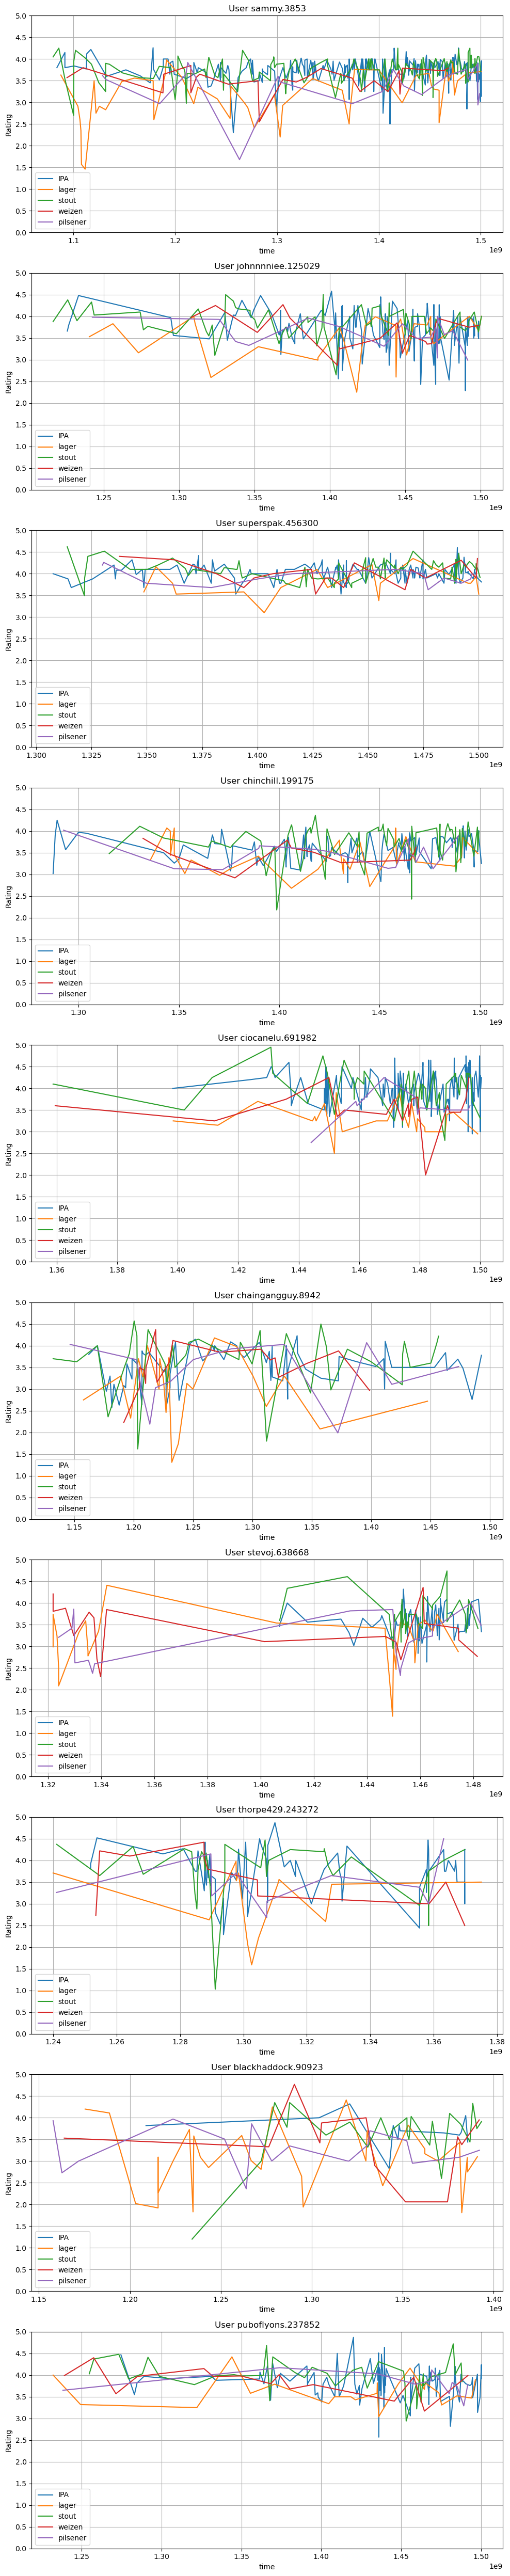

In [97]:
user_id_top10 = ratings.ba.groupby('user_id').count().sort_values(by='beer_id', ascending=False).head(10).index

fig, ax = plt.subplots(10, 1, figsize=(10, 50))
for index, user in enumerate(user_id_top10): #
#    print('IPA:', IPA_filtered[IPA_filtered['user_id'] == user].shape[0])
#    print('lager:',lager_filtered[lager_filtered['user_id'] == user].shape[0])
#    print('stout:',stout_filtered[stout_filtered['user_id'] == user].shape[0])
#    print('weizen:',weizen_filtered[weizen_filtered['user_id'] == user].shape[0])
#    print('pilsener:',pilsener_filtered[pilsener_filtered['user_id'] == user].shape[0])
    x_IPA = IPA_filtered[IPA_filtered['user_id'] == user].date
    x_lager = lager_filtered[lager_filtered['user_id'] == user].date
    x_stout = stout_filtered[stout_filtered['user_id'] == user].date
    x_weizen = weizen_filtered[weizen_filtered['user_id'] == user].date
    x_pilsener = pilsener_filtered[pilsener_filtered['user_id'] == user].date

    y_IPA = IPA_filtered[IPA_filtered['user_id'] == user].rating
    y_lager = lager_filtered[lager_filtered['user_id'] == user].rating
    y_stout = stout_filtered[stout_filtered['user_id'] == user].rating
    y_weizen = weizen_filtered[weizen_filtered['user_id'] == user].rating
    y_pilsener = pilsener_filtered[pilsener_filtered['user_id'] == user].rating

    ax[index].plot(x_IPA, y_IPA, label='IPA')
    ax[index].plot(x_lager, y_lager, label='lager')
    ax[index].plot(x_stout, y_stout, label='stout')
    ax[index].plot(x_weizen, y_weizen, label='weizen')
    ax[index].plot(x_pilsener, y_pilsener, label='pilsener')
    ax[index].set_title(f'User {user}')
    ax[index].legend()
    ax[index].set_ylim(0, 5)
    ax[index].set_yticks(np.arange(0, 5.5, 0.5))
    ax[index].set_xlabel('time')
    ax[index].set_ylabel('Rating')
    ax[index].grid()

plt.tight_layout()


